# Dummy Code for a prompt

Need to test out some code for the prompt:

```
Plot the jet pT for all jets in mc23_13p6TeV:mc23_13p6TeV.801167.Py8EG_A14NNPDF23LO_jj_JZ2.deriv.DAOD_PHYSLITE.e8514_e8528_a911_s4114_r15224_r15225_p6697
```

Output()

c:\Users\gordo\Code\iris-hep\atlas-plot-agent\.venv\Lib\site-packages\mplhep\utils.py:577: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


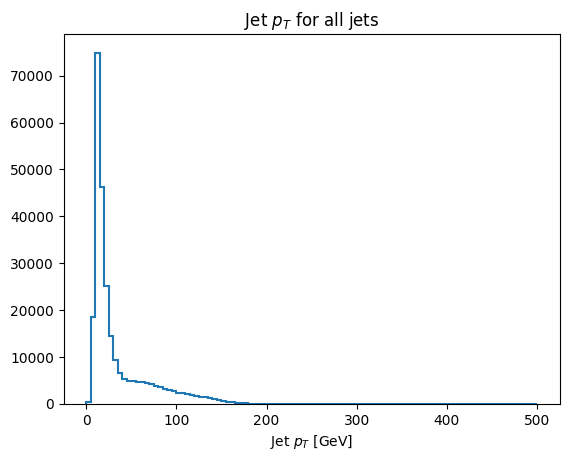

In [ ]:
from func_adl_servicex_xaodr25 import FuncADLQueryPHYSLITE
from servicex_analysis_utils import to_awk
from servicex import deliver, ServiceXSpec, Sample, dataset

import awkward as ak
import matplotlib.pyplot as plt
import hist

# Define the dataset
ds_name = "mc23_13p6TeV:mc23_13p6TeV.801167.Py8EG_A14NNPDF23LO_jj_JZ2.deriv.DAOD_PHYSLITE.e8514_e8528_a911_s4114_r15224_r15225_p6697"

# Create ServiceX dataset and source running on PHYSLITE.
phys_lite_base = FuncADLQueryPHYSLITE()

# Query: get all jet pT
jet_pts_query = phys_lite_base.SelectMany(lambda evt: evt.Jets()).Select(
    lambda jet: {"jet_pt": jet.pt() / 1000.0}  # Default to plotting GeV not MeV
)

# Do the fetch
all_jet_pts = to_awk(
    deliver(
        ServiceXSpec(
            Sample=[
                Sample(
                    Name="jet_data",
                    Dataset=dataset.Rucio(ds_name),
                    NFiles=1,
                    Query=jet_pts_query,  # type: ignore
                )
            ]
        ),
        servicex_name="servicex-release-prod",
    )
)

# Create a histogram
h = hist.Hist.new.Reg(100, 0, 500, name="jet_pt", label="Jet $p_T$ [GeV]").Double()
h.fill(jet_pt=all_jet_pts["jet_data"].jet_pt)

# Plot
fig, ax = plt.subplots()
h.plot(ax=ax)
ax.set_title("Jet $p_T$ for all jets")
plt.show()